# Hyperparameter tuning

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

In [149]:
data = pd.read_csv('../../datasets/data-stemmed-R.csv')
Y = data['engagement.rate']
X = data.drop(columns=['engagement.rate'])
# columns_to_scale= [col for col in X.columns if col not in X.select_dtypes('bool').columns.tolist()]
# scaler = StandardScaler()
# X[columns_to_scale]= scaler.fit_transform(X[columns_to_scale]) 

**DISCLAIMER:** we want a robust result about the optimal hyperparameters, so we are going to implement a CV. 
Since our future models will be trained in training sets with size $\frac{9}{10}|D|$, we can do hyperparameter tuning with CV on the entire dataset (in order to mantain the same proportion)

# Decision tree

In [7]:
param_grid = {'min_samples_split': [2, 11, 16, 26,31, 51, 101, 151, 201,501]}
# Create RegressorTree
dt = DecisionTreeRegressor()

# Use GridSearchCV to find the best hyperparameters
dt_grid_search = GridSearchCV(dt, param_grid, cv=10, scoring="neg_mean_absolute_error")
dt_grid_search.fit(X, Y)

# Print the best hyperparameters
dt_best_params = dt_grid_search.best_params_

In [8]:
print(f"Decision trees Best hyperparameters: {dt_best_params}")

Decision trees Best hyperparameters: {'min_samples_split': 101}


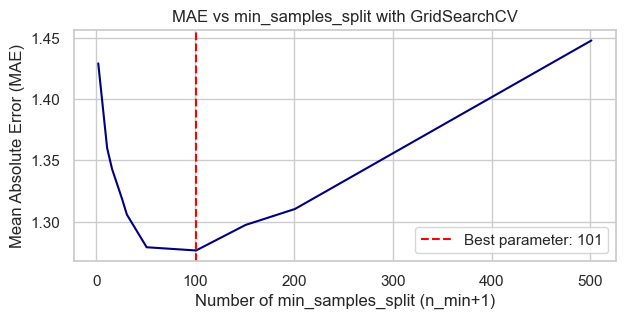

In [217]:
# Get the results in a DataFrame
dt_results = pd.DataFrame(dt_grid_search.cv_results_)

# Plot MAE vs n_neighbors using Seaborn
plt.figure(figsize=(7, 3))
sns.lineplot(x=dt_results['param_min_samples_split'], y=-dt_results['mean_test_score'],color='navy')

# Highlight the best parameter
dt_best_param = dt_grid_search.best_params_['min_samples_split']
plt.axvline(x=dt_best_param, color='red', linestyle='--', label=f'Best parameter: {dt_best_param}')

# Add labels and title
plt.xlabel('Number of min_samples_split (n_min+1)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs min_samples_split with GridSearchCV')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Knn

In [12]:
# Define the range of neighbors
param_grid = {'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100]}

# Create KNeighborsRegressor
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best hyperparameters
knn_grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="neg_mean_absolute_error")
knn_grid_search.fit(X, Y)

# Print the best hyperparameters
knn_best_params = knn_grid_search.best_params_

In [11]:
print(f"KNN Best hyperparameters: {knn_best_params}")

KNN Best hyperparameters: {'n_neighbors': 10}


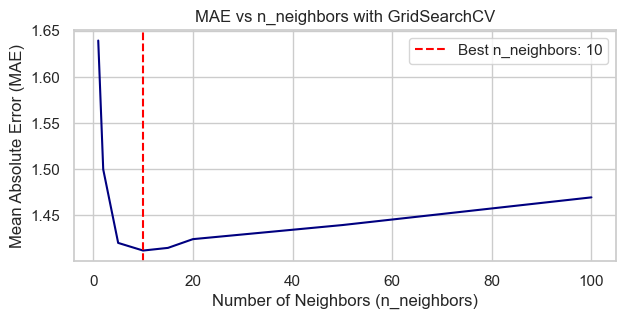

In [216]:
# Get the results in a DataFrame
knn_results = pd.DataFrame(knn_grid_search.cv_results_)

# Plot MAE vs n_neighbors using Seaborn
plt.figure(figsize=(7, 3))
sns.lineplot(x=knn_results['param_n_neighbors'], y=-knn_results['mean_test_score'],color='navy')

# Highlight the best parameter
knn_best_param = knn_grid_search.best_params_['n_neighbors']
plt.axvline(x=knn_best_param, color='red', linestyle='--', label=f'Best n_neighbors: {knn_best_param}')

# Add labels and title
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs n_neighbors with GridSearchCV')
plt.legend()

# Show the plot
plt.show()

# Random Forest

In [19]:
n_estimators= [10,15,25,50,75,100, 250, 500]
min_samples_split= [2, 11, 26, 51,76,101] #corrisponde a 1+n_min di medvet
max_features= [math.floor(math.sqrt(X.shape[1])), X.shape[1] // 3]

param_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

# Create KNeighborsRegressor
rf = RandomForestRegressor(n_jobs=-1) #n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.

# Use GridSearchCV to find the best hyperparameters
rf_grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="neg_mean_absolute_error")
rf_grid_search.fit(X, Y)

# Print the best hyperparameters
rf_best_params = rf_grid_search.best_params_

In [20]:
print(f"Random forest Best hyperparameters: {rf_best_params}")

Random forest Best hyperparameters: {'max_features': 94, 'min_samples_split': 2, 'n_estimators': 500}


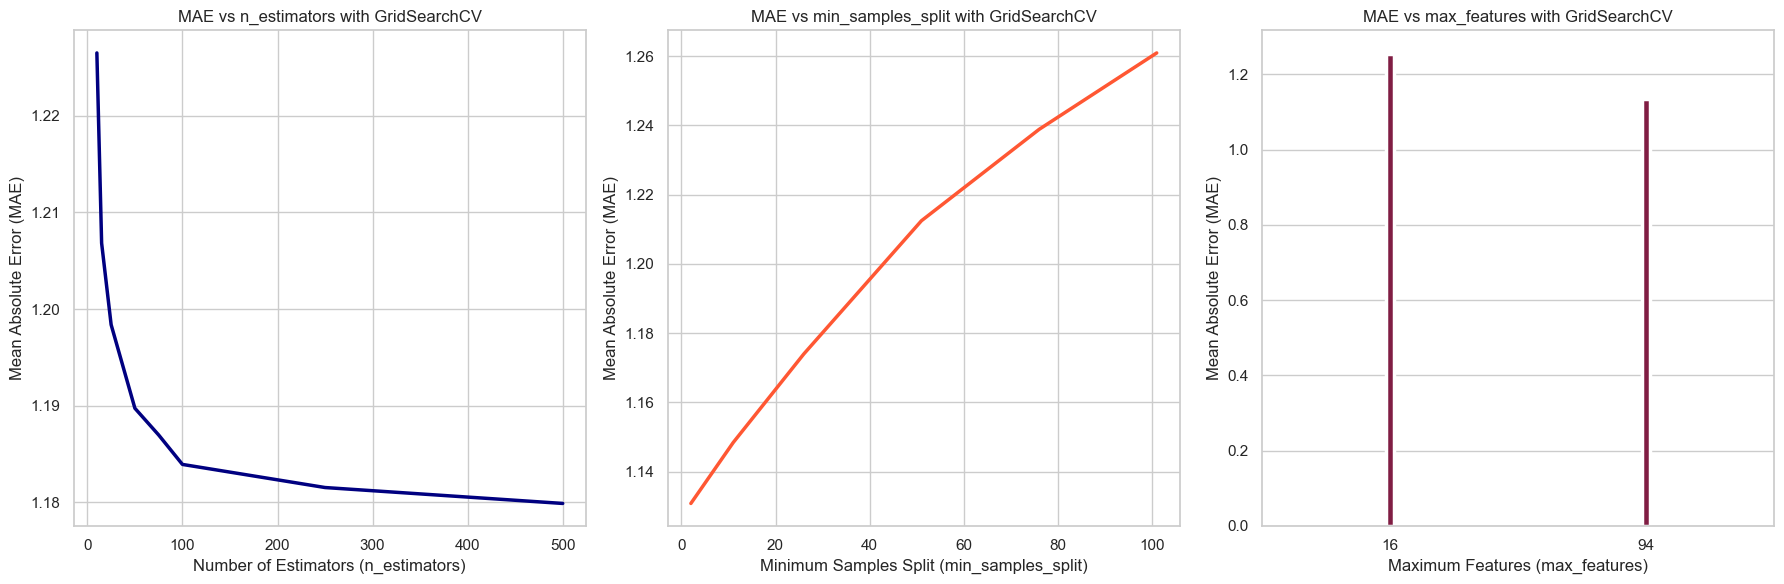

In [212]:
# Get the results in a DataFrame
rf_results = pd.DataFrame(rf_grid_search.cv_results_)

# Create a 1x3 matrix of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE vs n_estimators
sns.lineplot(x='param_n_estimators', y=-rf_results['mean_test_score'],
             data=rf_results, ax=axes[0],errorbar=None,linewidth = 2.5,
             color='navy')
axes[0].set_xlabel('Number of Estimators (n_estimators)')
axes[0].set_ylabel('Mean Absolute Error (MAE)')
axes[0].set_title('MAE vs n_estimators with GridSearchCV')

# Plot MAE vs min_samples_split
sns.lineplot(x='param_min_samples_split', y=-rf_results['mean_test_score'],
             data=rf_results, ax=axes[1],errorbar=None,linewidth = 2.5,
             color='#FF5733')
axes[1].set_xlabel('Minimum Samples Split (min_samples_split)')
axes[1].set_ylabel('Mean Absolute Error (MAE)')
axes[1].set_title('MAE vs min_samples_split with GridSearchCV')

# Plot MAE vs max_features
sns.barplot(x='param_max_features', y=-rf_results['mean_test_score'],
             data=rf_results, ax=axes[2],errorbar=None,linewidth = 2.5,
             color='#900C3F',width=0.03)
axes[2].set_xlabel('Maximum Features (max_features)')
axes[2].set_ylabel('Mean Absolute Error (MAE)')
axes[2].set_title('MAE vs max_features with GridSearchCV')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [157]:
# Extracting necessary columns
desired_columns = ['param_n_estimators', 'param_min_samples_split', 'param_max_features', 'mean_test_score']
extracted_data = rf_results[desired_columns].copy()

# Renaming columns for clarity
extracted_data.columns = ['n_estimators', 'min_samples_split', 'max_features', 'mae']

# Converting negative mean test scores to positive MAE
extracted_data['mae'] = -extracted_data['mae']

extracted_data=extracted_data[extracted_data['max_features']==X.shape[1] // 3]

In [154]:
X.shape[1] // 3

94

In [158]:
extracted_data.head()

,n_estimators,min_samples_split,max_features,mae
48,10,2,94,1.120977
49,15,2,94,1.099922
50,25,2,94,1.091771
51,50,2,94,1.071458
52,75,2,94,1.071574


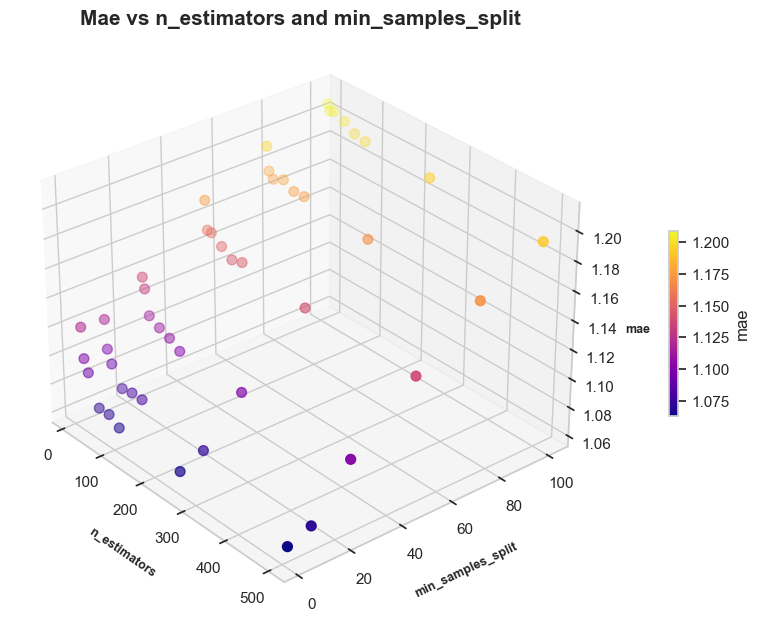

In [177]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming extracted_data is your DataFrame
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(extracted_data['n_estimators'], extracted_data['min_samples_split'], extracted_data['mae'],
                     c=extracted_data['mae'], cmap='plasma', s=50)

# Customize the plot
ax.set_xlabel('n_estimators', labelpad=10, fontsize=9, fontweight='bold')
ax.set_ylabel('min_samples_split', labelpad=10, fontsize=9, fontweight='bold')
ax.set_zlabel('mae', labelpad=5, fontsize=9, fontweight='bold')
ax.set_title('Mae vs n_estimators and min_samples_split',
             fontsize=15, fontweight='bold')

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, label='mae', shrink=0.3, pad=.1)

# Change the perspective
ax.view_init(elev=30, azim=-40)  # Adjust the elevation and azimuthal angle as needed

# Show the plot
plt.show()
#save as image
#fig.savefig('mae_vs_n_estimators_and_min_samples_split_POINTS.png')



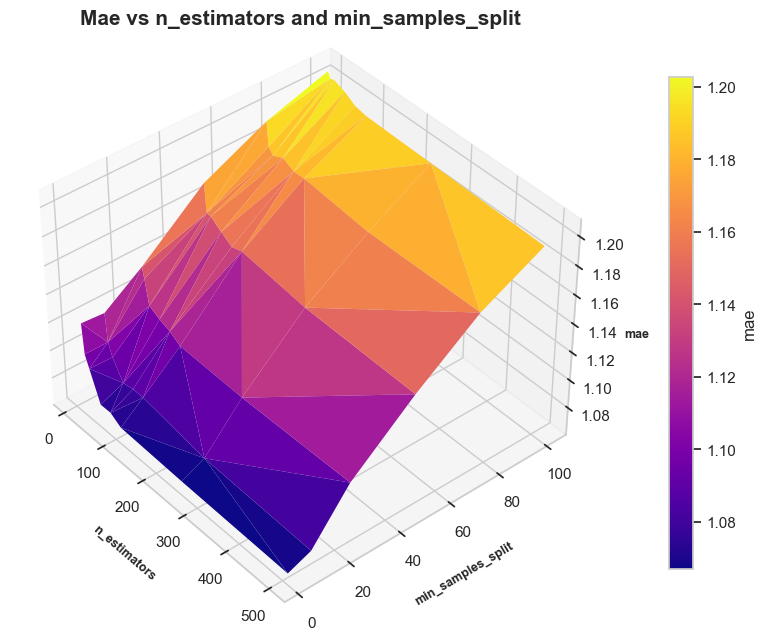

In [213]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

# Assuming extracted_data is your DataFrame
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a continuous surface
surf = ax.plot_trisurf(extracted_data['n_estimators'], extracted_data['min_samples_split'],
                       extracted_data['mae'], cmap='plasma', linewidth=0, antialiased=True)

# Customize the plot
ax.set_xlabel('n_estimators', labelpad=10, fontsize=9, fontweight='bold')
ax.set_ylabel('min_samples_split', labelpad=10, fontsize=9, fontweight='bold')
ax.set_zlabel('mae', labelpad=5, fontsize=9, fontweight='bold')
ax.set_title('Mae vs n_estimators and min_samples_split',
             fontsize=15, fontweight='bold')

# Add a colorbar
cbar = plt.colorbar(surf, ax=ax, label='mae', shrink=0.8, pad=.1)
ax.view_init(elev=40, azim=-40) 
# Show the plot
plt.show()
#save as image
#fig.savefig('mae_vs_n_estimators_and_min_samples_split_SURFACE.png')


# SVR

In [75]:
param_grid = {'kernel': ['linear', 'poly', 'rbf']}

sv = SVR()

# Use GridSearchCV to find the best hyperparameters
sv_grid_search = GridSearchCV(sv, param_grid, cv=10, scoring="neg_mean_absolute_error")
sv_grid_search.fit(X, Y)

# Print the best hyperparameters
sv_best_params = sv_grid_search.best_params_

In [187]:
print(f"SVR best kernel: {sv_best_params}")

SVR best kernel: {'kernel': 'rbf'}
